In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data

data = pd.read_csv('CSV/IPL_Auction_2022_FullList.csv')

In [3]:
data.head()

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,1,M,Trent Boult,New Zealand,NaN,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,"SRH, KKR, DD,MI",MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,1,M,Pat Cummins,Australia,NaN,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,"DD, MI, KKR",KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,1,M,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,"DCH, MI, SRH, DC",DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,1,M,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,1,M,Kagiso Rabada,South Africa,NaN,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,DC,Capped,200,9.25 CR,Punjab Kings,Sold


In [4]:
data.columns

Index(['Set No.', 'Set Name', 'Player', 'Country', 'State Association', 'Age',
       'Specialism', 'Batting', 'Bowling', 'IPL', 'Previous IPLTeam(s)',
       '2021 Team', 'C/U/A', 'Base Price', 'Sold Price', 'New Franchise',
       'Bid'],
      dtype='object')

In [5]:
data = data[['Player', 'Country', 'State Association', 'Age',
       'Specialism', 'Batting', 'Bowling', 'IPL', '2021 Team', 'C/U/A', 'Base Price', 'Sold Price', 'New Franchise',
       'Bid']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             589 non-null    object 
 1   Country            589 non-null    object 
 2   State Association  369 non-null    object 
 3   Age                589 non-null    int64  
 4   Specialism         589 non-null    object 
 5   Batting            589 non-null    object 
 6   Bowling            589 non-null    object 
 7   IPL                270 non-null    float64
 8   2021 Team          165 non-null    object 
 9   C/U/A              589 non-null    object 
 10  Base Price         589 non-null    int64  
 11  Sold Price         204 non-null    object 
 12  New Franchise      204 non-null    object 
 13  Bid                589 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 64.5+ KB


In [7]:
#Data Cleaning

In [8]:
data.isnull().sum()

Player                 0
Country                0
State Association    220
Age                    0
Specialism             0
Batting                0
Bowling                0
IPL                  319
2021 Team            424
C/U/A                  0
Base Price             0
Sold Price           385
New Franchise        385
Bid                    0
dtype: int64

In [9]:
data_state_association = data[['Player','Country','State Association']]
data_state_association

,Player,Country,State Association
0,Trent Boult,New Zealand,NaN
1,Pat Cummins,Australia,NaN
2,Shikhar Dhawan,India,DDCA
3,Shreyas Iyer,India,MCA
4,Kagiso Rabada,South Africa,NaN
...,...,...,...
584,Safyaan Sharif,Scotland,NaN
585,Henry Shipley,New Zealand,NaN
586,Maxwell Swaminathan,India,MCA
587,Johan Van Dyk,South Africa,NaN


In [10]:
data_state_association.isnull().sum()

Player                 0
Country                0
State Association    220
dtype: int64

In [11]:
data_state_association['State Association'].value_counts()

TNCA      30
DDCA      27
KSCA      26
UPCA      26
MCA       21
RCA       19
PCA       18
HYCA      15
CAB       14
HCA       14
KCA       13
BCA       13
MACA      13
VCA       12
JSCA      11
SCA       10
ACA       10
JKCA      10
HPCA       9
MPCA       9
GUCA       8
BICA       6
RSPB       5
UTCA       5
CSCSCA     5
GCA        4
SSCB       4
CAP        3
CAU        3
OCA        2
ASCA       1
NCA        1
TCA        1
MECA       1
Name: State Association, dtype: int64

In [12]:
#filling values for International players in State Association Column
data['State Association'] = data['State Association'].fillna('International')

In [13]:
data['State Association']

0      International
1      International
2               DDCA
3                MCA
4      International
           ...      
584    International
585    International
586              MCA
587    International
588    International
Name: State Association, Length: 589, dtype: object

In [14]:
data

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,Trent Boult,New Zealand,International,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,Australia,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,South Africa,International,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,International,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,Associate,20,NaN,NaN,UnSold
585,Henry Shipley,New Zealand,International,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
586,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
587,Johan Van Dyk,South Africa,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,Uncapped,20,NaN,NaN,UnSold


In [15]:
data.isnull().sum()

Player                 0
Country                0
State Association      0
Age                    0
Specialism             0
Batting                0
Bowling                0
IPL                  319
2021 Team            424
C/U/A                  0
Base Price             0
Sold Price           385
New Franchise        385
Bid                    0
dtype: int64

In [16]:
data[['Player','IPL']]

,Player,IPL
0,Trent Boult,62.0
1,Pat Cummins,37.0
2,Shikhar Dhawan,192.0
3,Shreyas Iyer,87.0
4,Kagiso Rabada,50.0
...,...,...
584,Safyaan Sharif,NaN
585,Henry Shipley,NaN
586,Maxwell Swaminathan,NaN
587,Johan Van Dyk,NaN


In [17]:
data['Player'].dtypes

dtype('O')

In [18]:
data.dtypes

Player                object
Country               object
State Association     object
Age                    int64
Specialism            object
Batting               object
Bowling               object
IPL                  float64
2021 Team             object
C/U/A                 object
Base Price             int64
Sold Price            object
New Franchise         object
Bid                   object
dtype: object

In [19]:
data[['Player','IPL']].dtypes

Player     object
IPL       float64
dtype: object

In [20]:
#Renaming column IPL to IPL Runs for clear understanding
data=data.rename(columns={'IPL':'IPL_Runs'})
data

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL_Runs,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,Trent Boult,New Zealand,International,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,Australia,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,South Africa,International,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,International,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,Associate,20,NaN,NaN,UnSold
585,Henry Shipley,New Zealand,International,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
586,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
587,Johan Van Dyk,South Africa,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,Uncapped,20,NaN,NaN,UnSold


In [21]:
#Filling Runs value for Debutant Players in the IPL
data['IPL_Runs'] = data['IPL_Runs'].fillna(0)
data

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL_Runs,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,Trent Boult,New Zealand,International,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,Australia,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,South Africa,International,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,International,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,NaN,Associate,20,NaN,NaN,UnSold
585,Henry Shipley,New Zealand,International,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,NaN,Uncapped,20,NaN,NaN,UnSold
586,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,0.0,NaN,Uncapped,20,NaN,NaN,UnSold
587,Johan Van Dyk,South Africa,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,NaN,Uncapped,20,NaN,NaN,UnSold


In [22]:
data.isnull().sum()

Player                 0
Country                0
State Association      0
Age                    0
Specialism             0
Batting                0
Bowling                0
IPL_Runs               0
2021 Team            424
C/U/A                  0
Base Price             0
Sold Price           385
New Franchise        385
Bid                    0
dtype: int64

In [23]:
data[['Player','2021 Team']]

,Player,2021 Team
0,Trent Boult,MI
1,Pat Cummins,KKR
2,Shikhar Dhawan,DC
3,Shreyas Iyer,DC
4,Kagiso Rabada,DC
...,...,...
584,Safyaan Sharif,NaN
585,Henry Shipley,NaN
586,Maxwell Swaminathan,NaN
587,Johan Van Dyk,NaN


In [24]:
#Filling Value for Players who did not Played in previous year.
data['2021 Team'] = data['2021 Team'].fillna('DNP')
data

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL_Runs,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,Trent Boult,New Zealand,International,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,Australia,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,South Africa,International,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,International,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Associate,20,NaN,NaN,UnSold
585,Henry Shipley,New Zealand,International,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Uncapped,20,NaN,NaN,UnSold
586,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,0.0,DNP,Uncapped,20,NaN,NaN,UnSold
587,Johan Van Dyk,South Africa,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Uncapped,20,NaN,NaN,UnSold


In [25]:
data.isnull().sum()

Player                 0
Country                0
State Association      0
Age                    0
Specialism             0
Batting                0
Bowling                0
IPL_Runs               0
2021 Team              0
C/U/A                  0
Base Price             0
Sold Price           385
New Franchise        385
Bid                    0
dtype: int64

In [26]:
data['Sold Price'].isnull().sum()

385

In [27]:
data[['Player','Sold Price','New Franchise', 'Bid']]

,Player,Sold Price,New Franchise,Bid
0,Trent Boult,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,9.25 CR,Punjab Kings,Sold
...,...,...,...,...
584,Safyaan Sharif,NaN,NaN,UnSold
585,Henry Shipley,NaN,NaN,UnSold
586,Maxwell Swaminathan,NaN,NaN,UnSold
587,Johan Van Dyk,NaN,NaN,UnSold


In [28]:
data[['Player','Sold Price','New Franchise', 'Bid']].dtypes

Player           object
Sold Price       object
New Franchise    object
Bid              object
dtype: object

In [29]:
#Filling values for 'Sold Price' column for Unsold Players in the Auction
data['Sold Price'] = data['Sold Price'].fillna('UnSold')
data

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL_Runs,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,Trent Boult,New Zealand,International,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,Australia,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,South Africa,International,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,International,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Associate,20,UnSold,NaN,UnSold
585,Henry Shipley,New Zealand,International,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Uncapped,20,UnSold,NaN,UnSold
586,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,0.0,DNP,Uncapped,20,UnSold,NaN,UnSold
587,Johan Van Dyk,South Africa,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Uncapped,20,UnSold,NaN,UnSold


In [30]:
#Filling values for 'New Franchise' column for Unsold Players in the Auction
data['New Franchise'] = data['New Franchise'].fillna('UnSold')
data

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL_Runs,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,Trent Boult,New Zealand,International,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,Pat Cummins,Australia,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,Kagiso Rabada,South Africa,International,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,International,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Associate,20,UnSold,UnSold,UnSold
585,Henry Shipley,New Zealand,International,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Uncapped,20,UnSold,UnSold,UnSold
586,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,0.0,DNP,Uncapped,20,UnSold,UnSold,UnSold
587,Johan Van Dyk,South Africa,International,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,DNP,Uncapped,20,UnSold,UnSold,UnSold


In [31]:
#checking if any null values are left there
data.isnull().sum()

Player               0
Country              0
State Association    0
Age                  0
Specialism           0
Batting              0
Bowling              0
IPL_Runs             0
2021 Team            0
C/U/A                0
Base Price           0
Sold Price           0
New Franchise        0
Bid                  0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Base Price'>

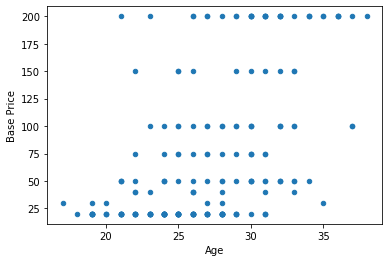

In [32]:
#Additional - Plotting for visualisation
filter = data['Bid'] == 'Sold'

data_temp = data.where(filter)
data_temp.dropna()

data_temp.plot.scatter(x = 'Age', y = 'Base Price')

In [33]:
#Trying some filters with the data
f1 = data['Age'] > 35
f2 = data['Bid'] == 'Sold'
temp = data.where(f1 & f2)
temp2 = temp.dropna()

In [34]:
temp2

,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL_Runs,2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
2,Shikhar Dhawan,India,DDCA,36.0,BATSMAN,LHB,-,192.0,DC,Capped,200.0,8.25 CR,Punjab Kings,Sold
8,Faf Du Plessis,South Africa,International,37.0,BATSMAN,RHB,RIGHT ARM Leg Spin,100.0,CSK,Capped,200.0,7 CR,Royal Challengers Bangalore,Sold
15,Robin Uthappa,India,KCA,36.0,BATSMAN,RHB,-,193.0,CSK,Capped,200.0,2 CR,Chennai Super Kings,Sold
16,Dwayne Bravo,West Indies,International,38.0,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,151.0,CSK,Capped,200.0,4.4 CR,Chennai Super Kings,Sold
26,Dinesh Karthik,India,TNCA,36.0,WICKETKEEPER,RHB,-,213.0,KKR,Capped,200.0,5.5 CR,Royal Challengers Bangalore,Sold
29,Ambati Rayudu,India,ACA,36.0,WICKETKEEPER,RHB,-,175.0,CSK,Capped,200.0,6.75 CR,Chennai Super Kings,Sold
30,Wriddhiman Saha,India,CAB,37.0,WICKETKEEPER,RHB,-,133.0,SRH,Capped,100.0,1.90 CR,Gujarat Titans,Sold
189,Mohammad Nabi,Afghanistan,International,37.0,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,17.0,SRH,Capped,100.0,1 CR,Kolkata Knight Riders,Sold


In [35]:
temp2.count()

Player               8
Country              8
State Association    8
Age                  8
Specialism           8
Batting              8
Bowling              8
IPL_Runs             8
2021 Team            8
C/U/A                8
Base Price           8
Sold Price           8
New Franchise        8
Bid                  8
dtype: int64

In [37]:
data.to_csv("CSV/IPL22_Auction_CleanData.csv", index=False)